SQL Analysis

How many clients does the bank have and are above the age of 50?

What’s the distribution (in %) between male and female clients?

Let’s define a new variable called age_group:

10 < x ≤ 30
30 < x ≤ 40
40 < x ≤ 50
50 < x ≤ 60
60 <x ≤ 120
Per each age_group, marital_status and income_category, find out the following values:

a. Churn_rate (in %)

b. Average Total_Relationship_Count

c. Minimum value of Total_Amt_Chng_Q4_Q1

d. Count of customers

Make sure to order the data by the number of customers in descending order***

Out of the male clients, who are “blue” card holders, how many (in %) fall under the income category 40K - 60K?

Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?

We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.

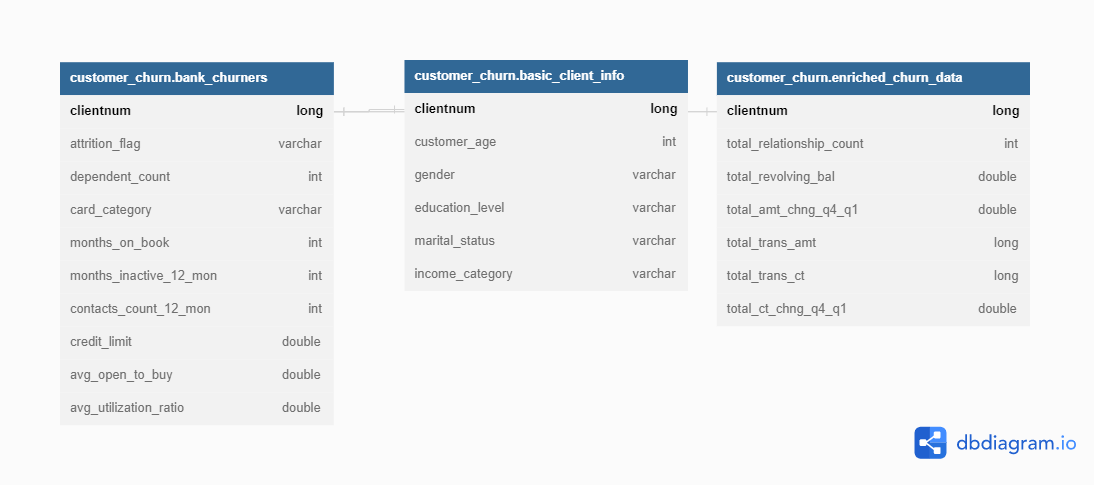



Question 1:

How many clients does the bank have and are above the age of 50?

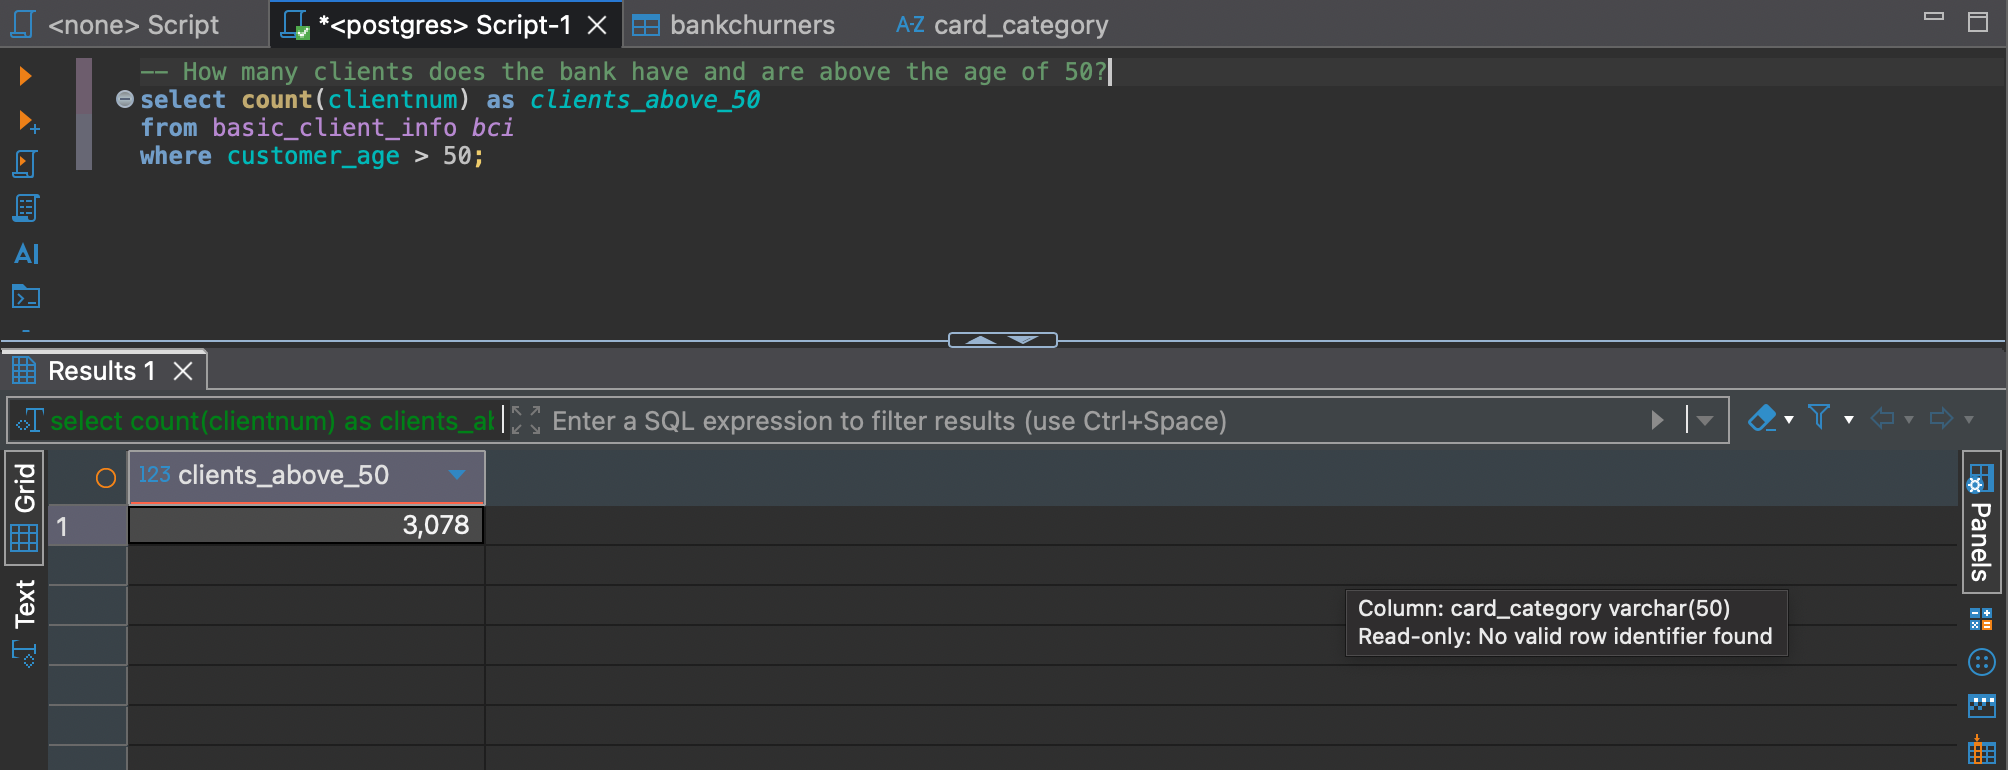

Question 2:

What’s the distribution (in %) between male and female clients?

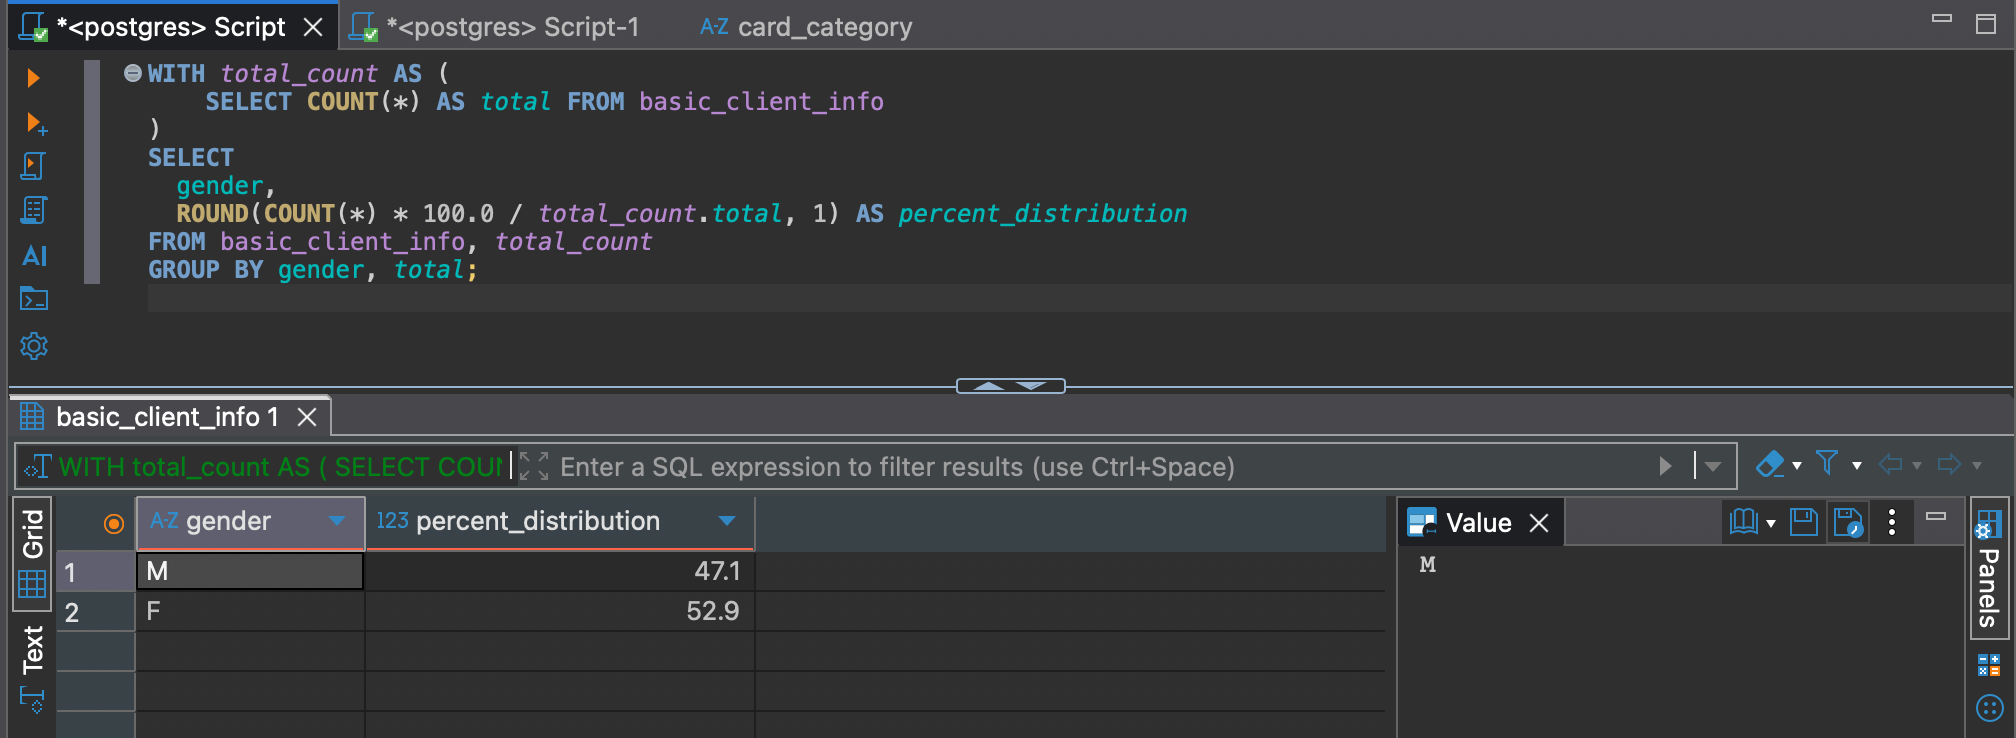

Question 3:

Per each age_group, marital_status and income_category, find out the following values:

a. Churn_rate (in %)
b. Average Total_Relationship_Count
c. Minimum value of Total_Amt_Chng_Q4_Q1
d. Count of customers

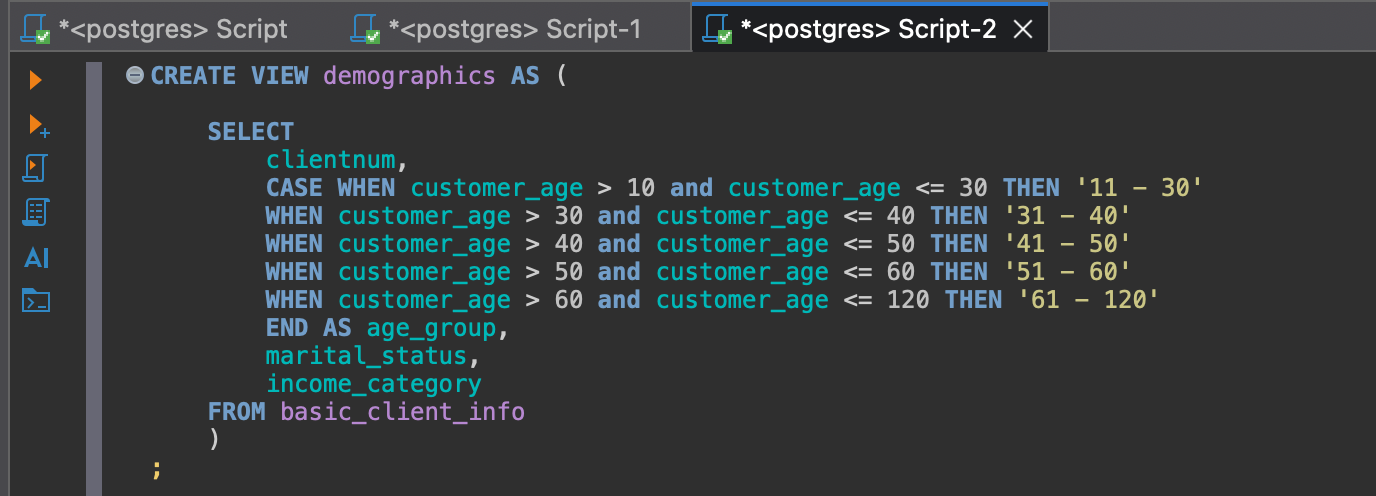
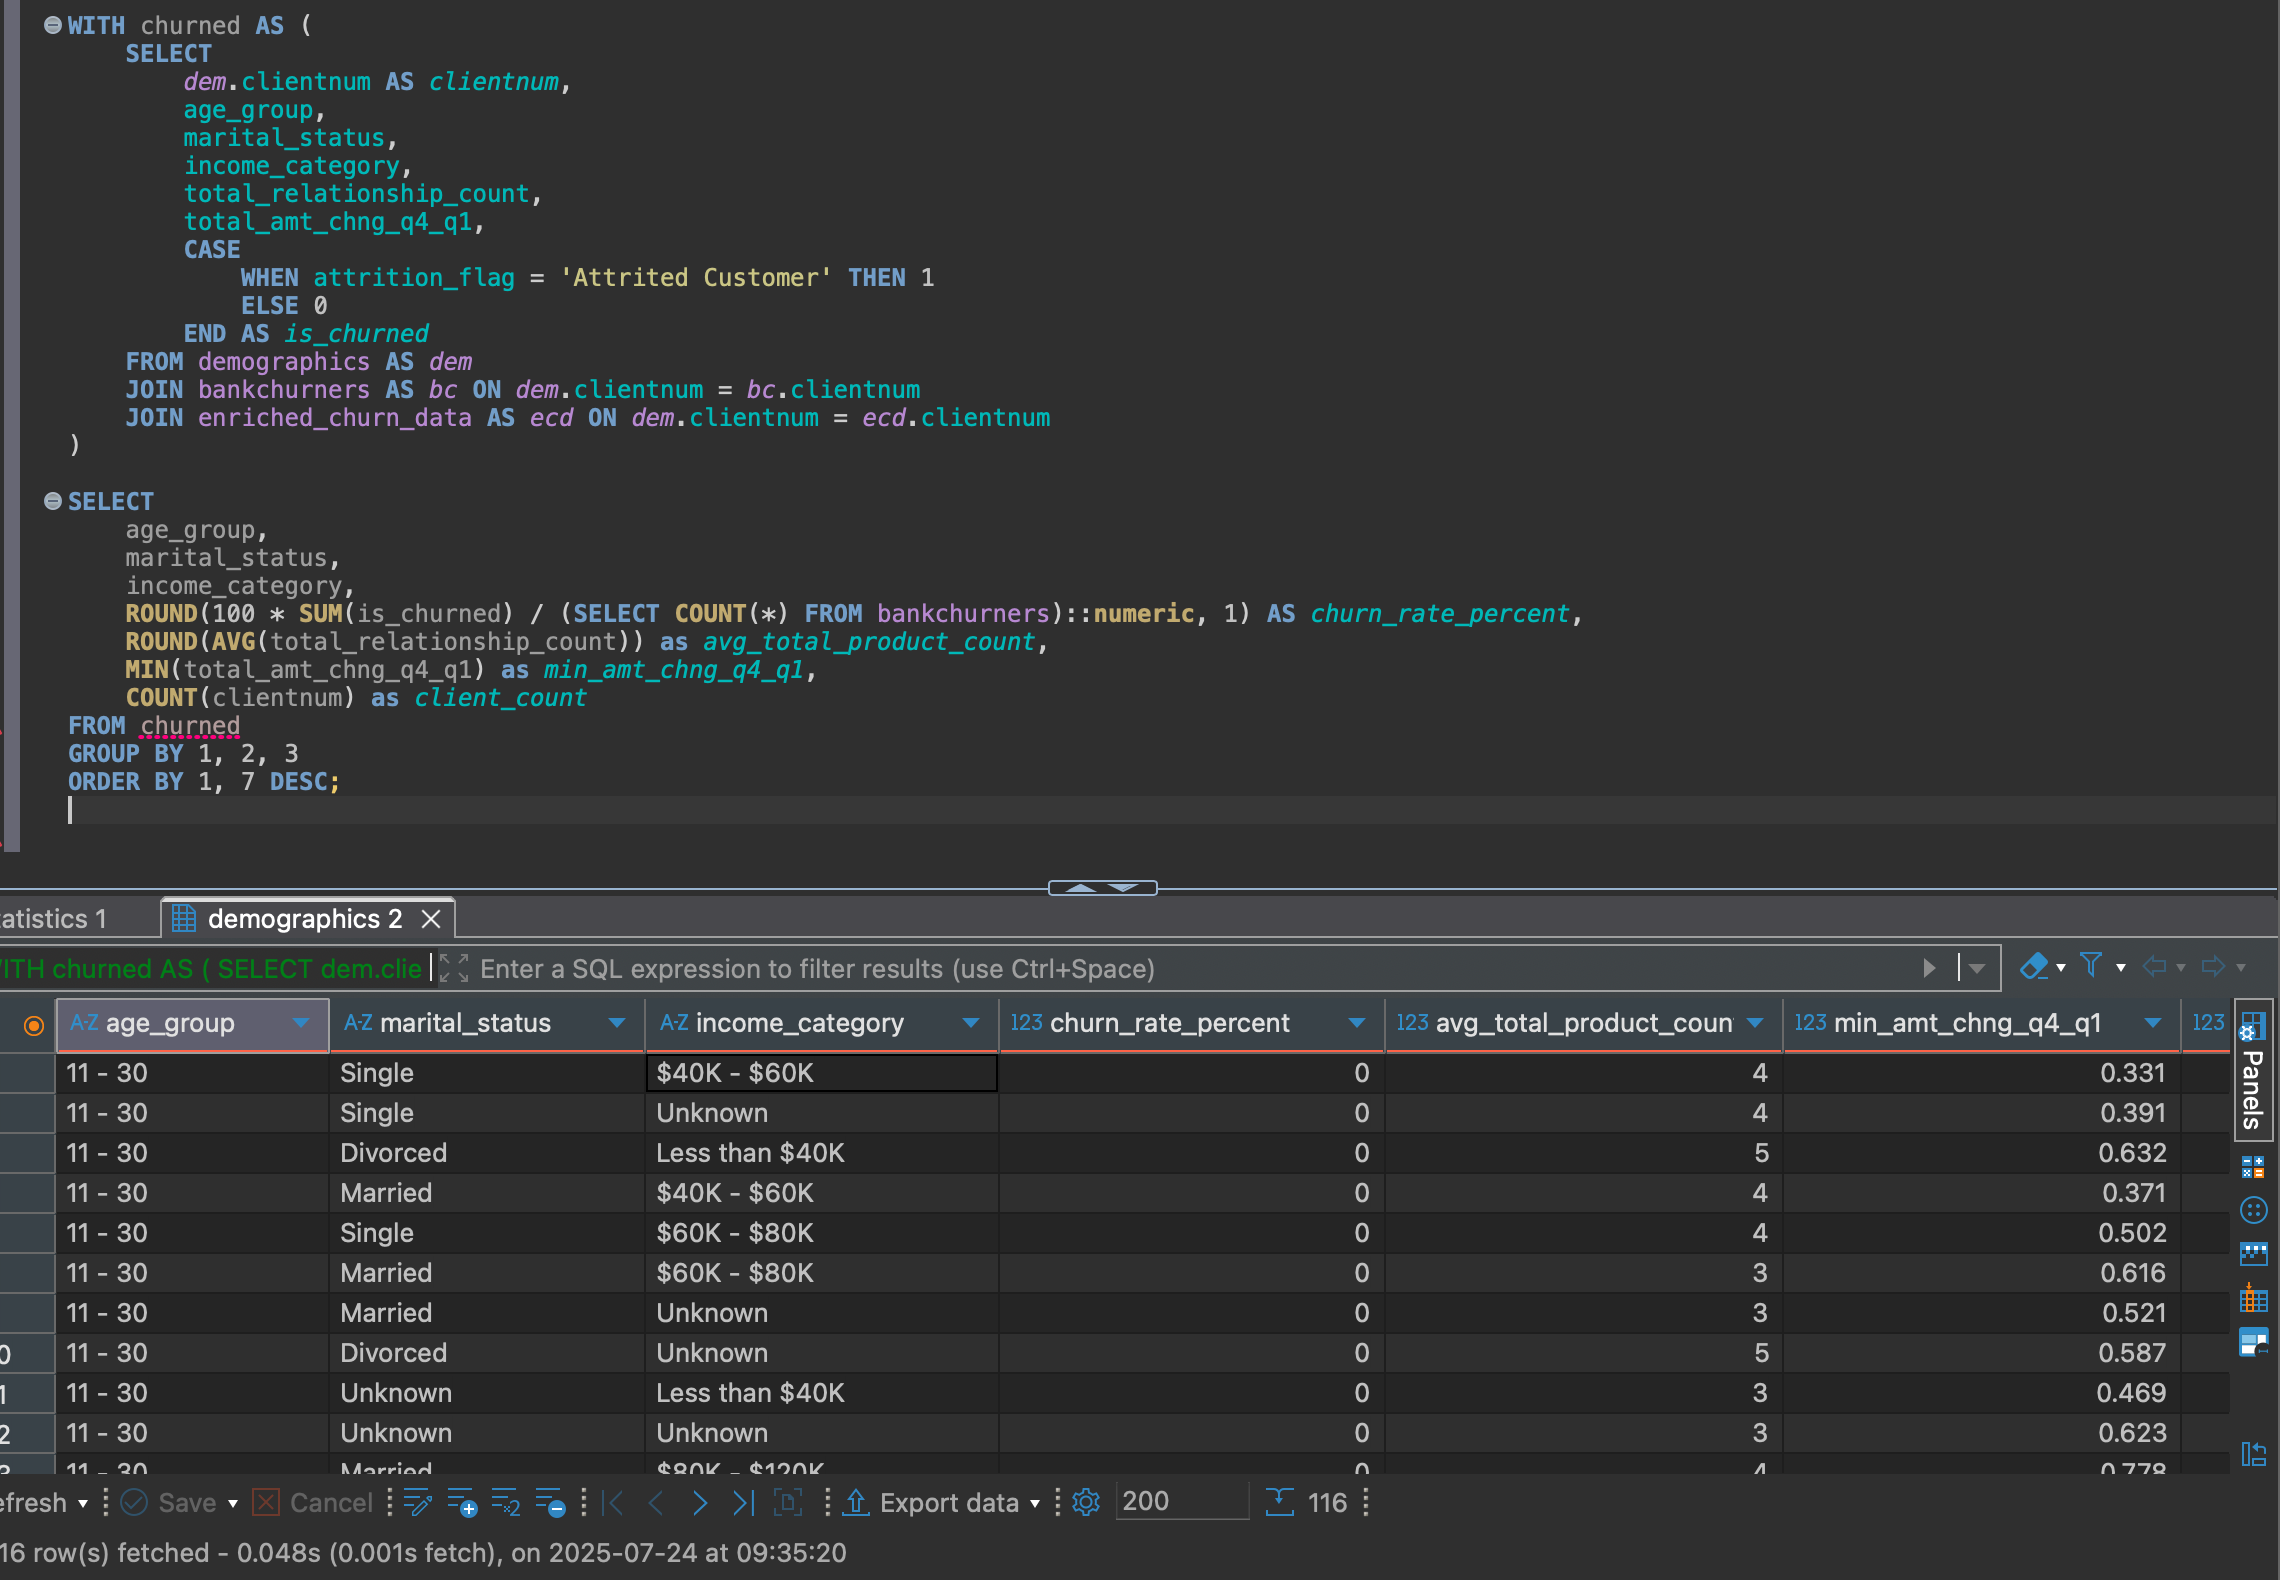

Question 4:

Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

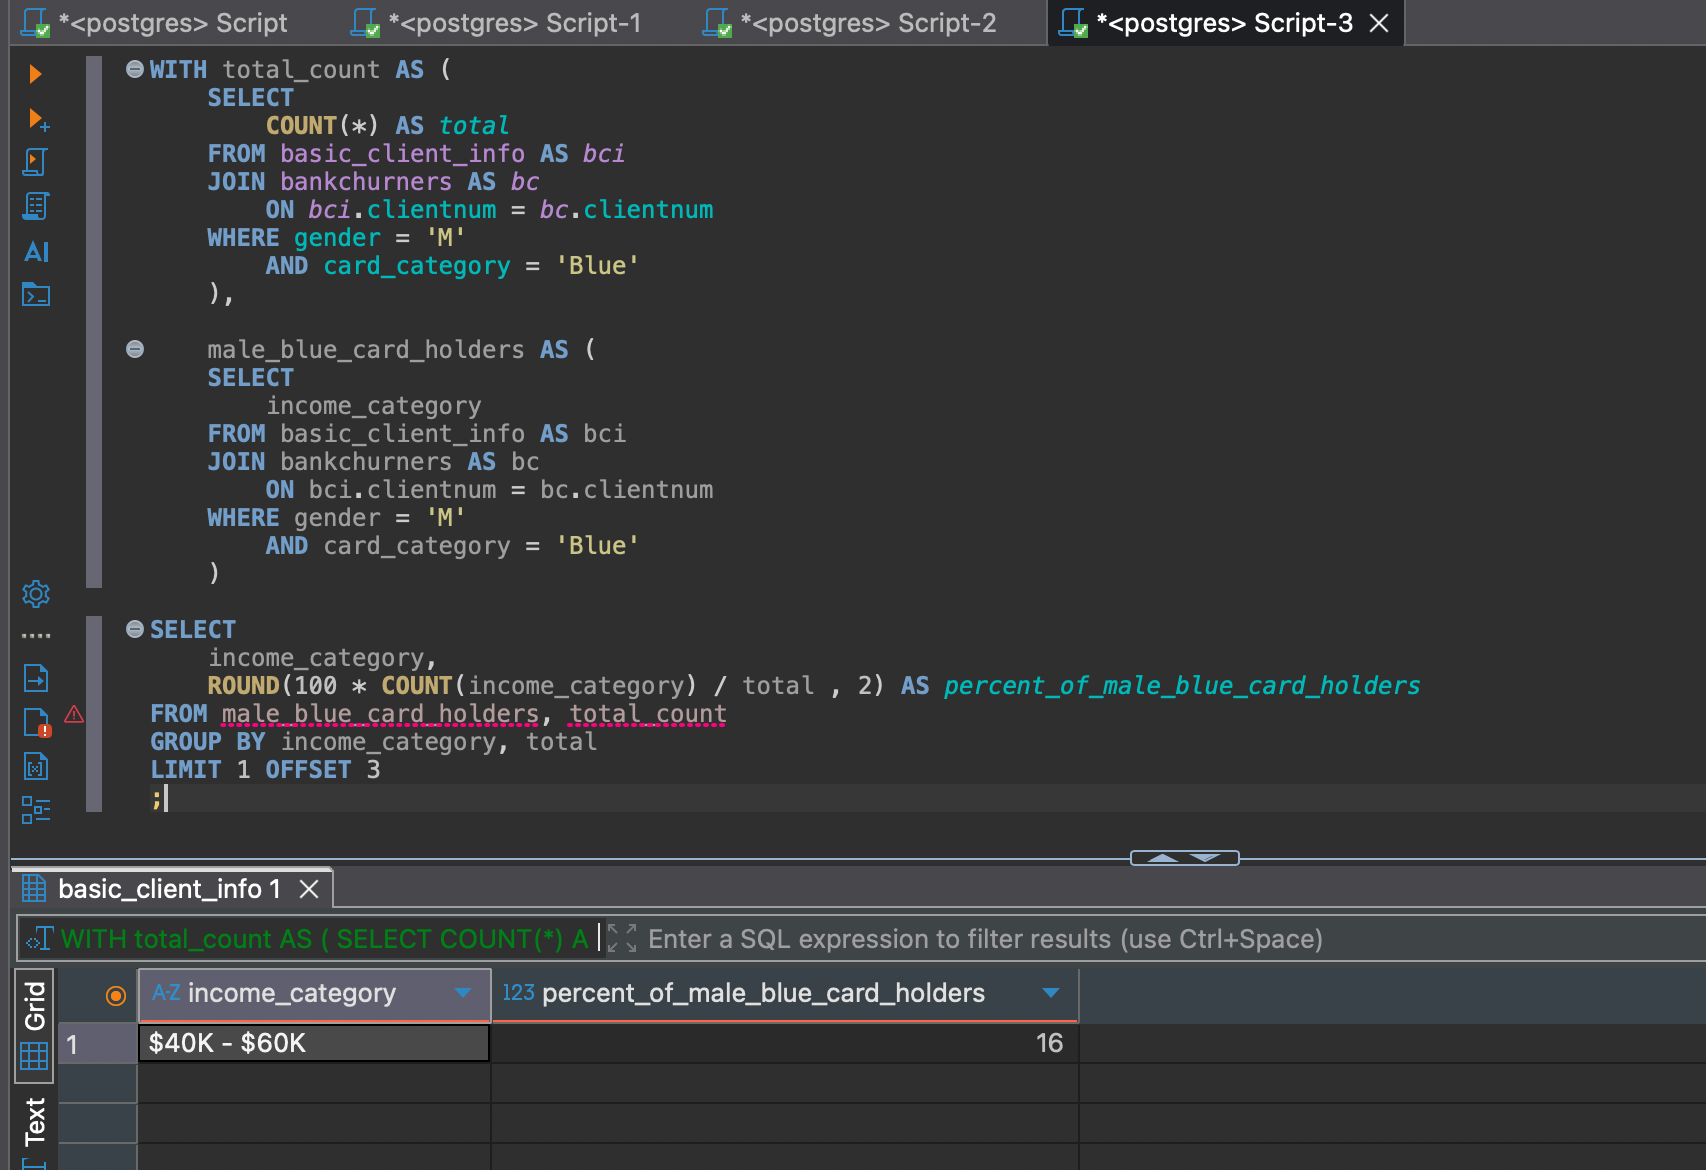


Question 5:

Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?

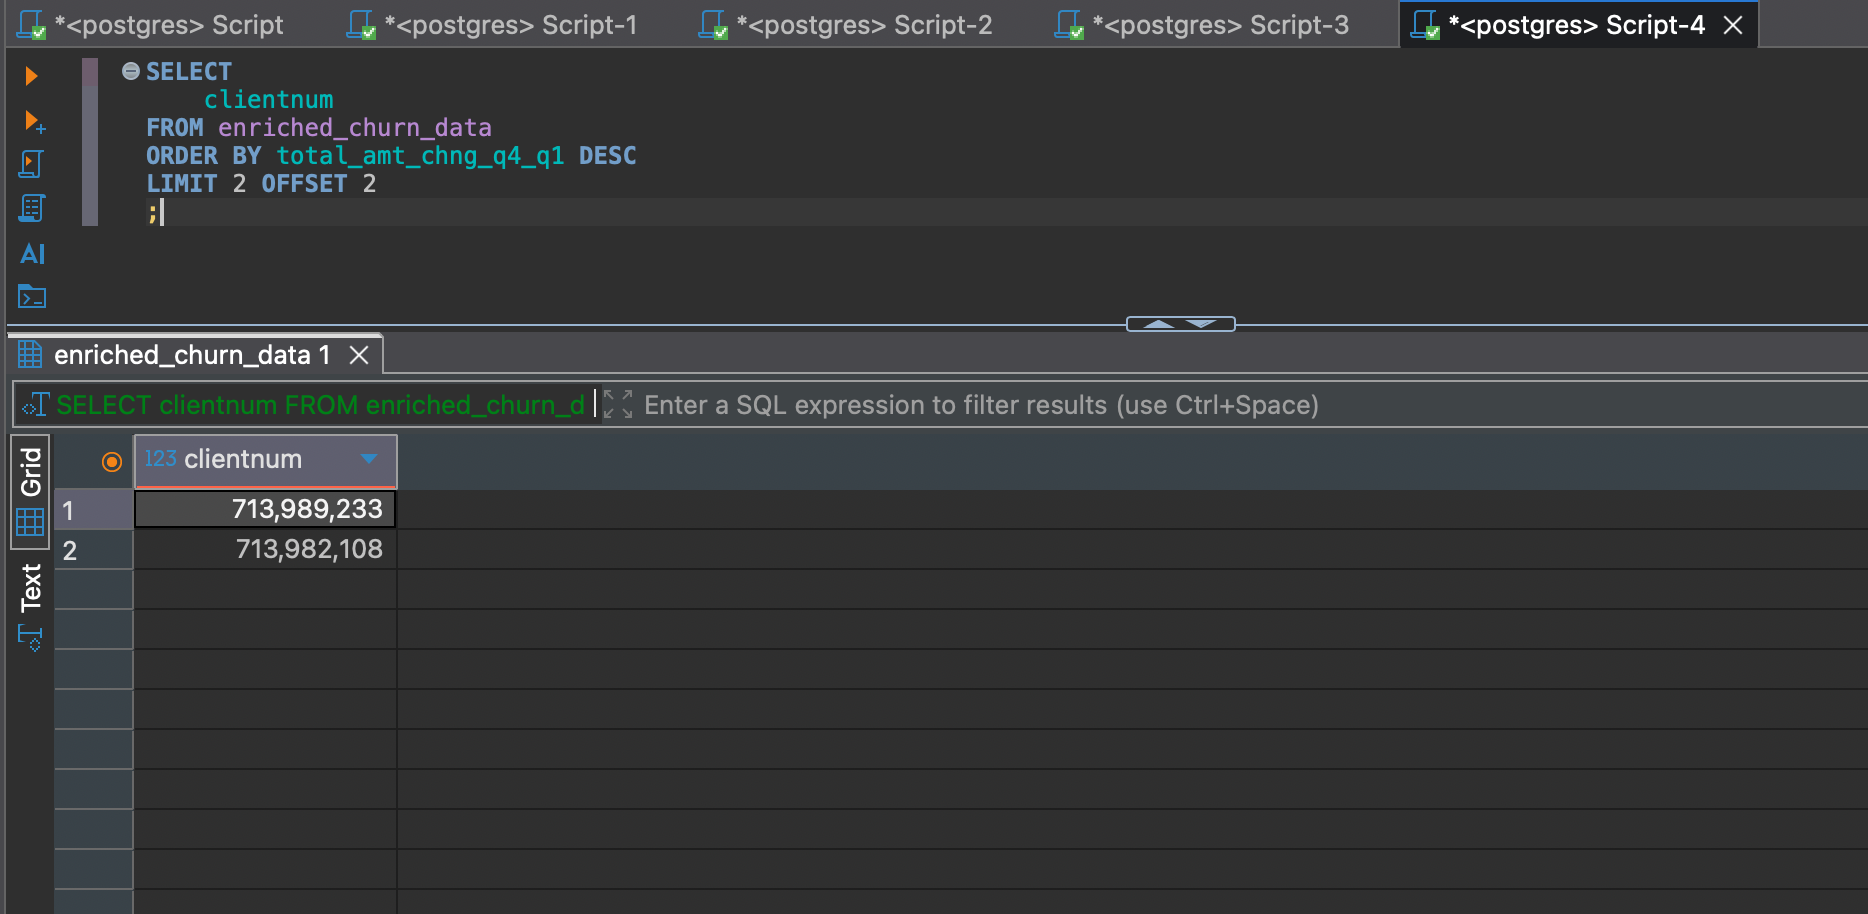


Question 6:

We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.

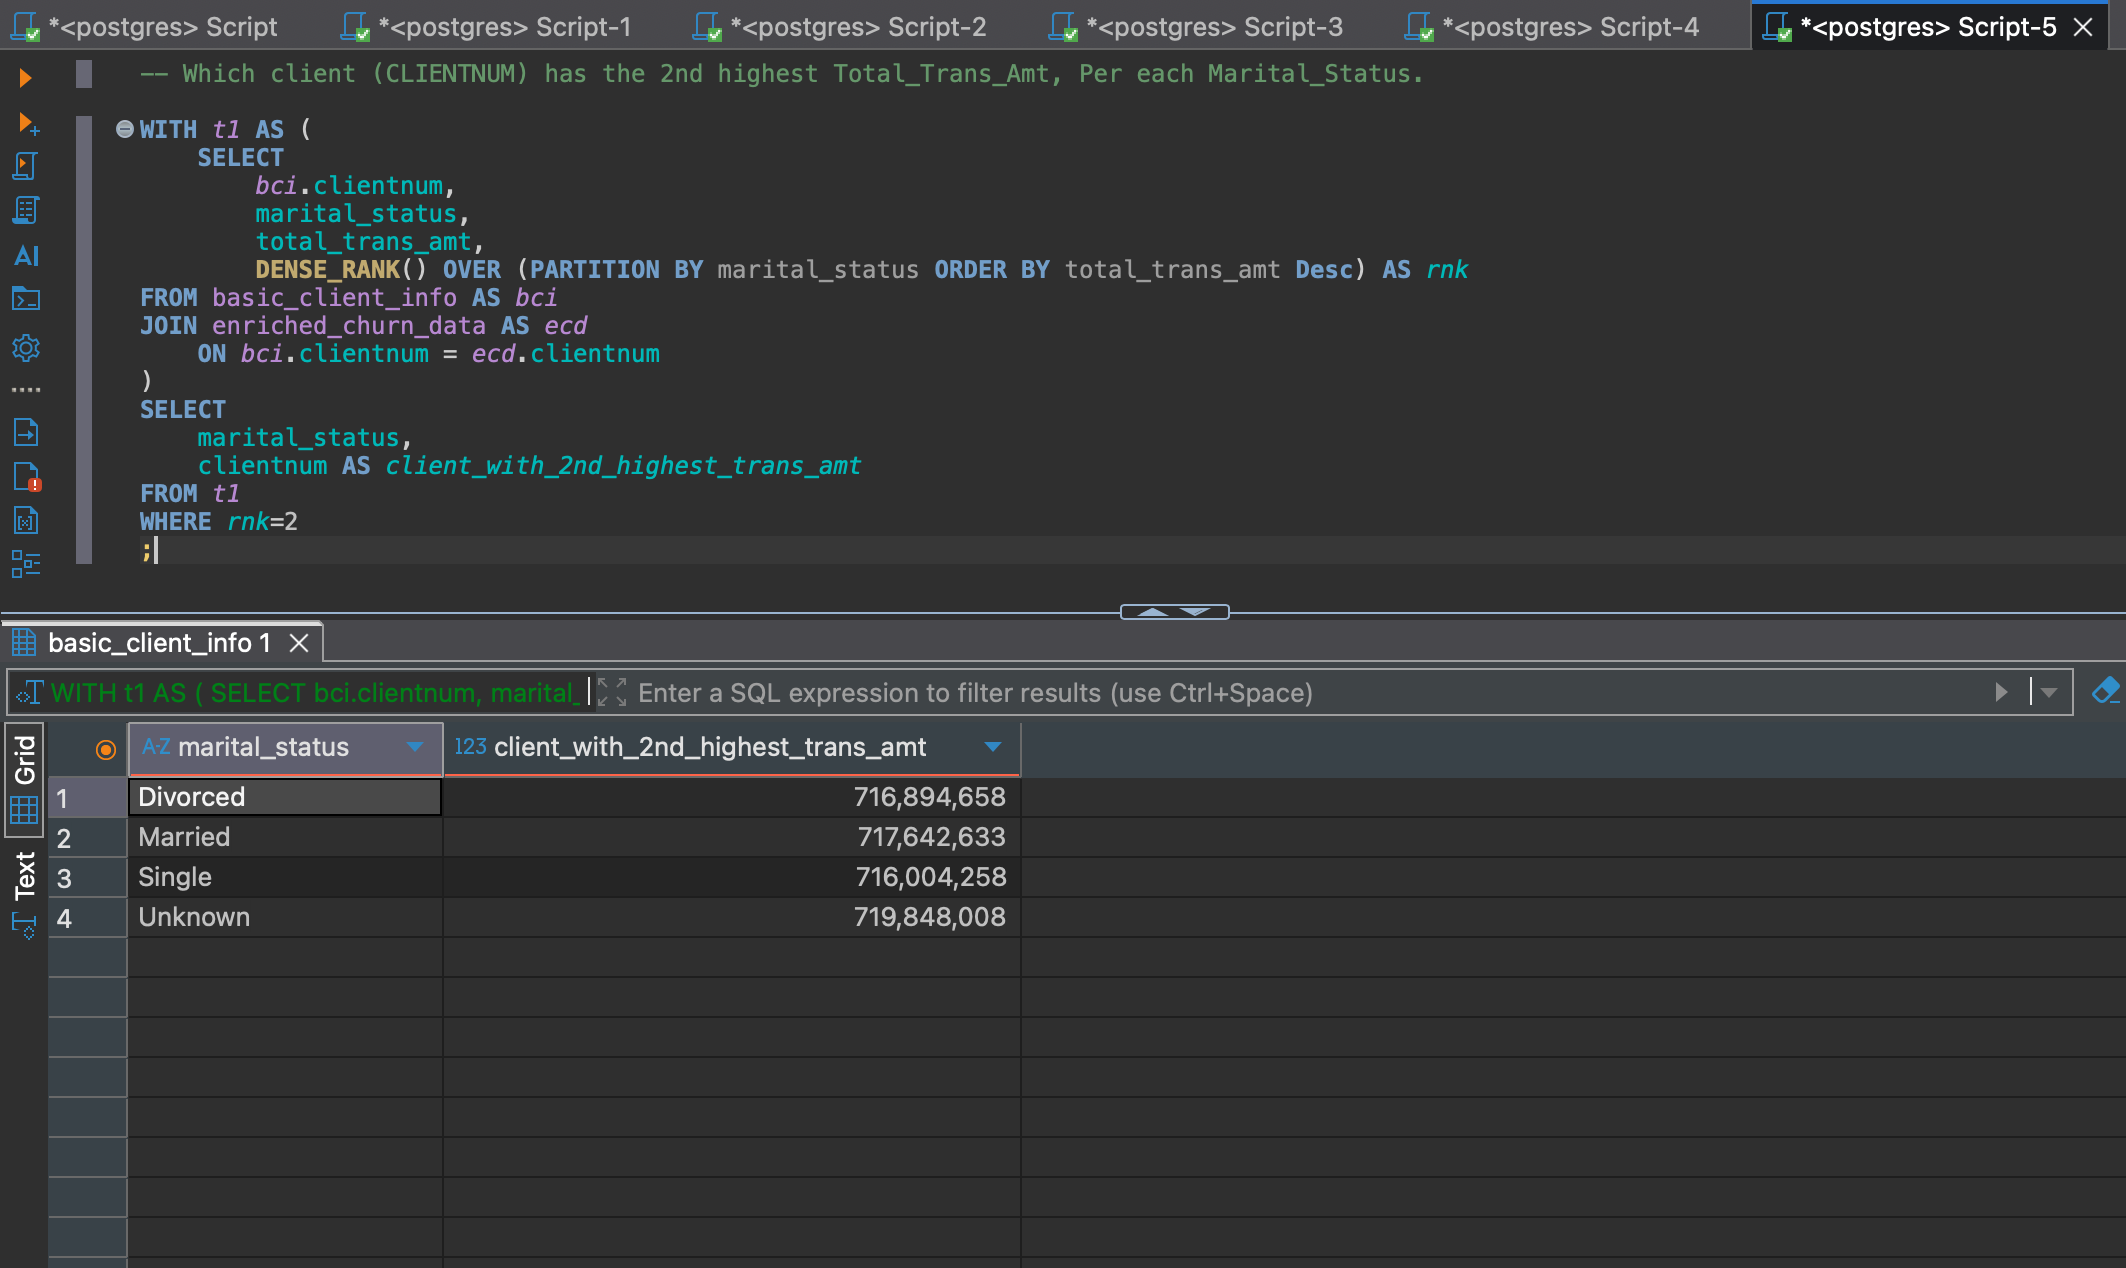


Database Integration

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as creds
import numpy as np
from sqlalchemy import create_engine, text  # ✅ Import text for executing raw SQL

try:
    engine = create_engine(
        f"postgresql+pg8000://{creds.PGUSER}:{creds.PGPASSWORD}@{creds.PGHOST}:{creds.PGPORT}/{creds.PGDATABASE}"
    )

    with engine.connect() as connection:
        connection.execute(text("SELECT 1"))  # ✅ Wrap raw SQL in text()
    print(f"✅ Successfully connected to the {creds.PGDATABASE} database!")

except Exception as e:
    print(f"❌ Error: Failed to connect to the {creds.PGDATABASE} database!")
    print(f"Exception details: {e}")


✅ Successfully connected to the postgres database!


Load data into df

In [15]:
table1 = 'bankchurners'
table2 = 'basic_client_info'
table3 = 'enriched_churn_data'

bank_churners_df = pd.read_sql_table(table1, engine)
basic_client_info_df = pd.read_sql_table(table2, engine)
enriched_churn_df = pd.read_sql_table(table3, engine)


In [17]:
bank_churners_df.head(3)


,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193,676,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215,9205,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882,7277,0.077


In [18]:
basic_client_info_df.head(3)


,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [19]:
enriched_churn_df.head(3)

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


Statistics Analysis

In [20]:
bank_churners_df.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.938679,7469.124617,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.788539,9090.695763,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.000000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


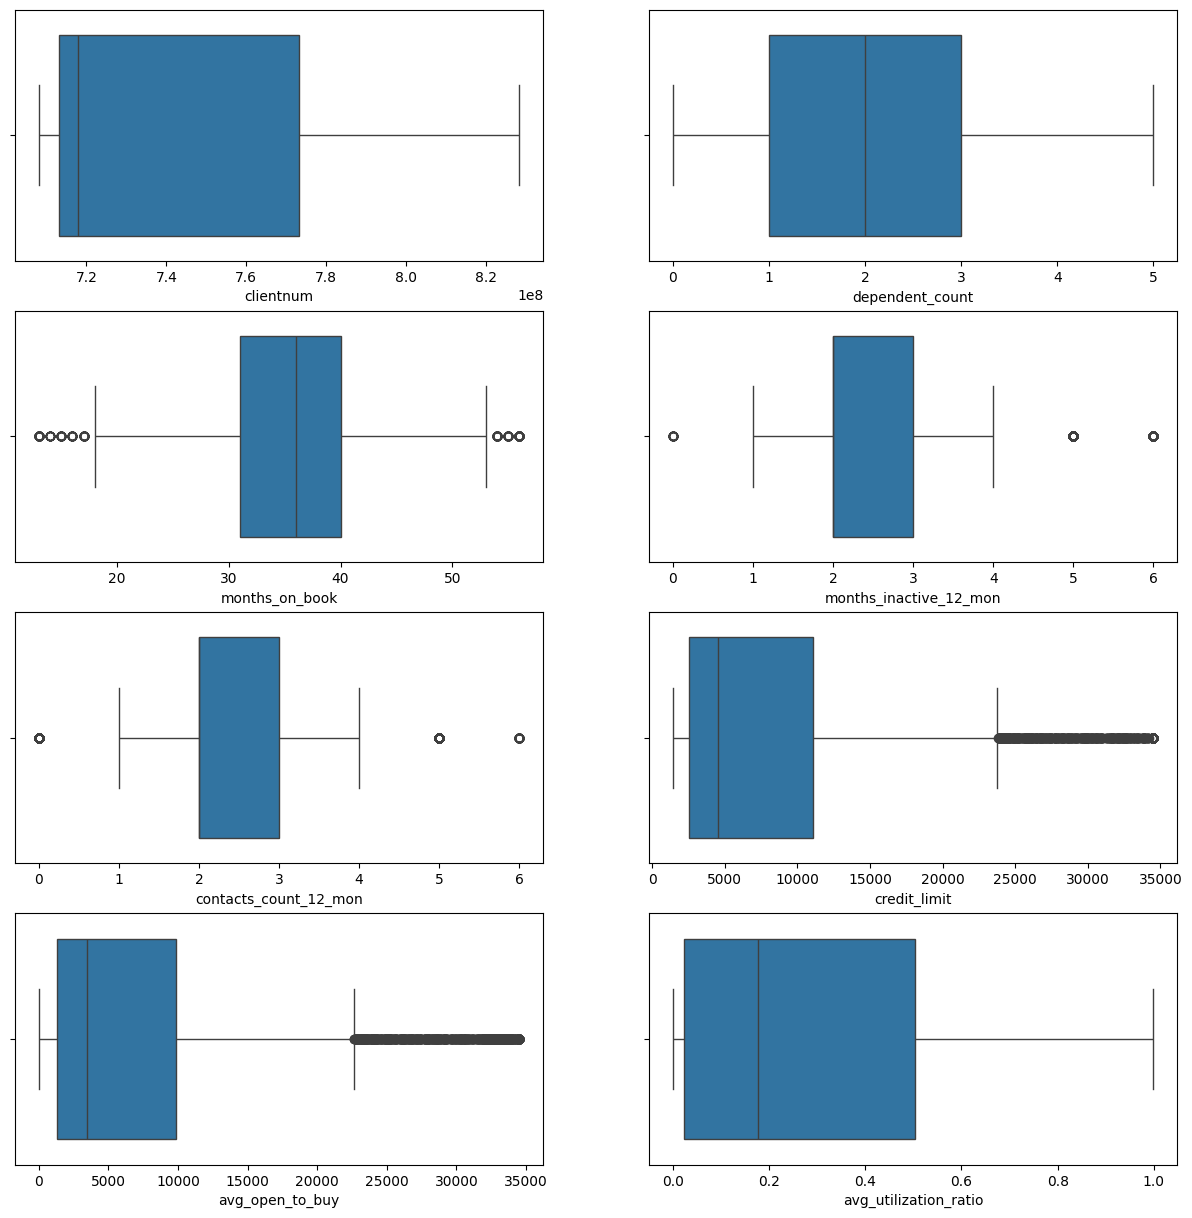





There are no outliers in the 'clientnum' column 


The 'attrition_flag' column is not a numerical column 


There are no outliers in the 'dependent_count' column 


The 'card_category' column is not a numerical column 


There are no outliers in the 'avg_utilization_ratio' column 


 Detected too many potential outliers in the following columns: ['months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'avg_open_to_buy']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



In [22]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=bank_churners_df, ax=axs[i])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = bank_churners_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")


In [23]:
# Printing the Lower and upper interquartile ranges for all the columns in the dataset.
variables = pd.DataFrame(columns=['Variable','Lower Limit','Upper Limit'])

nan_columns = []
for i, var in enumerate(bank_churners_df.columns):
    if var == 'clientnum':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    elif bank_churners_df[var].dtype == 'object':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    else:
        df = bank_churners_df[var]
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
    
    variables.loc[i] = [var, iqr_lower, iqr_upper]
    
print(f"\nFor the following variables with null values: {nan_columns}, clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values \n")

variables


For the following variables with null values: ['clientnum', 'attrition_flag', 'card_category'], clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values 



,Variable,Lower Limit,Upper Limit
0,clientnum,NaN,NaN
1,attrition_flag,NaN,NaN
2,dependent_count,-2.000,6.000
3,card_category,NaN,NaN
4,months_on_book,17.500,53.500
5,months_inactive_12_mon,0.500,4.500
6,contacts_count_12_mon,0.500,4.500
7,credit_limit,-10213.750,23836.250
8,avg_open_to_buy,-11477.250,22660.750
9,avg_utilization_ratio,-0.697,1.223


In [24]:
# Checking to know the datatypes of each column and if there are any missing values
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  int64  
 8   avg_open_to_buy         10127 non-null  int64  
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 791.3+ KB


In [25]:
# Checking to see if there are any duplicates in the dataset. This is the count of unique entries (i.e rows) in the dataset.
bank_churners_df[bank_churners_df.duplicated()].count()

clientnum                 0
attrition_flag            0
dependent_count           0
card_category             0
months_on_book            0
months_inactive_12_mon    0
contacts_count_12_mon     0
credit_limit              0
avg_open_to_buy           0
avg_utilization_ratio     0
dtype: int64

In [26]:
# Checking for unique variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(bank_churners_df.columns):
    variables.loc[i] = [var, bank_churners_df[var].nunique(), bank_churners_df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,clientnum,10127,"[806160108, 804424383, 708300483, 808284783, 7..."
1,attrition_flag,2,"[Existing Customer, Attrited Customer]"
2,dependent_count,6,"[1, 0, 2, 3, 4, 5]"
3,card_category,4,"[Blue, Silver, Gold, Platinum]"
4,months_on_book,44,"[56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 4..."
5,months_inactive_12_mon,7,"[2, 3, 4, 0, 1, 6, 5]"
6,contacts_count_12_mon,7,"[3, 2, 0, 1, 4, 5, 6]"
7,credit_limit,6205,"[3193, 10215, 7882, 1438, 13860, 3006, 2619, 3..."
8,avg_open_to_buy,6670,"[676, 9205, 7277, 1438, 12208, 489, 840, 1757,..."
9,avg_utilization_ratio,964,"[0.788, 0.099, 0.077, 0.0, 0.119, 0.837, 0.679..."


Stats Summary Client Info Dataset

In [27]:
basic_client_info_df.describe()

,clientnum,customer_age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [28]:
for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column")
    else:
        data = basic_client_info_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])

        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())

        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column")
        else:
            if len(list_of_outliers) > 10:
                # Using Seaborn's box plot for outlier detection
                sns.boxplot(x=column_name, data=basic_client_info_df)
                plt.title(f"\nChecking for Outliers in {column_name}")
                plt.xlabel(f"\n{column_name}")
                plt.show()
                print(f"\nDetected too many potential outliers in the '{column_name}' column to show. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.")
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are: {list_of_outliers} and the respective rows with the potential outliers are: {rows_with_outliers}")



There are no outliers in the 'clientnum' column

The potential ouliers in the 'customer_age' column are: [73, 70] and the respective rows with the potential outliers are: [4115, 8317]

The 'gender' column is not a numerical column

The 'education_level' column is not a numerical column

The 'marital_status' column is not a numerical column

The 'income_category' column is not a numerical column


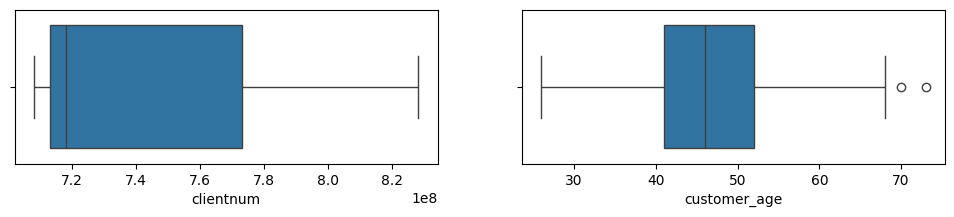





There are no outliers in the 'clientnum' column 


The potential ouliers in the 'customer_age' column are:
[73, 70] 
And the respective rows with the potential outlier are:
[4115, 8317]

The 'gender' column is not a numerical column 


The 'education_level' column is not a numerical column 


The 'marital_status' column is not a numerical column 


The 'income_category' column is not a numerical column 


 Detected too many potential outliers in the following columns: []. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



In [29]:
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=basic_client_info_df, ax=axs[i])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = basic_client_info_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")


In [30]:
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [31]:
basic_client_info_df[basic_client_info_df.duplicated()].count()

clientnum          0
customer_age       0
gender             0
education_level    0
marital_status     0
income_category    0
dtype: int64

In [32]:
variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(basic_client_info_df.columns):
    variables.loc[i] = [var, basic_client_info_df[var].nunique(), basic_client_info_df[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,clientnum,10127,"[708082083, 708083283, 708084558, 708085458, 7..."
1,customer_age,45,"[45, 58, 46, 34, 49, 43, 32, 37, 55, 52, 47, 5..."
2,gender,2,"[F, M]"
3,education_level,7,"[High School, Unknown, Doctorate, Uneducated, ..."
4,marital_status,4,"[Married, Single, Divorced, Unknown]"
5,income_category,6,"[Less than $40K, $40K - $60K, $80K - $120K, Un..."


Summary Statistics of the enriched churn dataset

In [33]:
# Checking to see basic statistics of the numerical columns in the enriched churn dataset
enriched_churn_df.describe()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


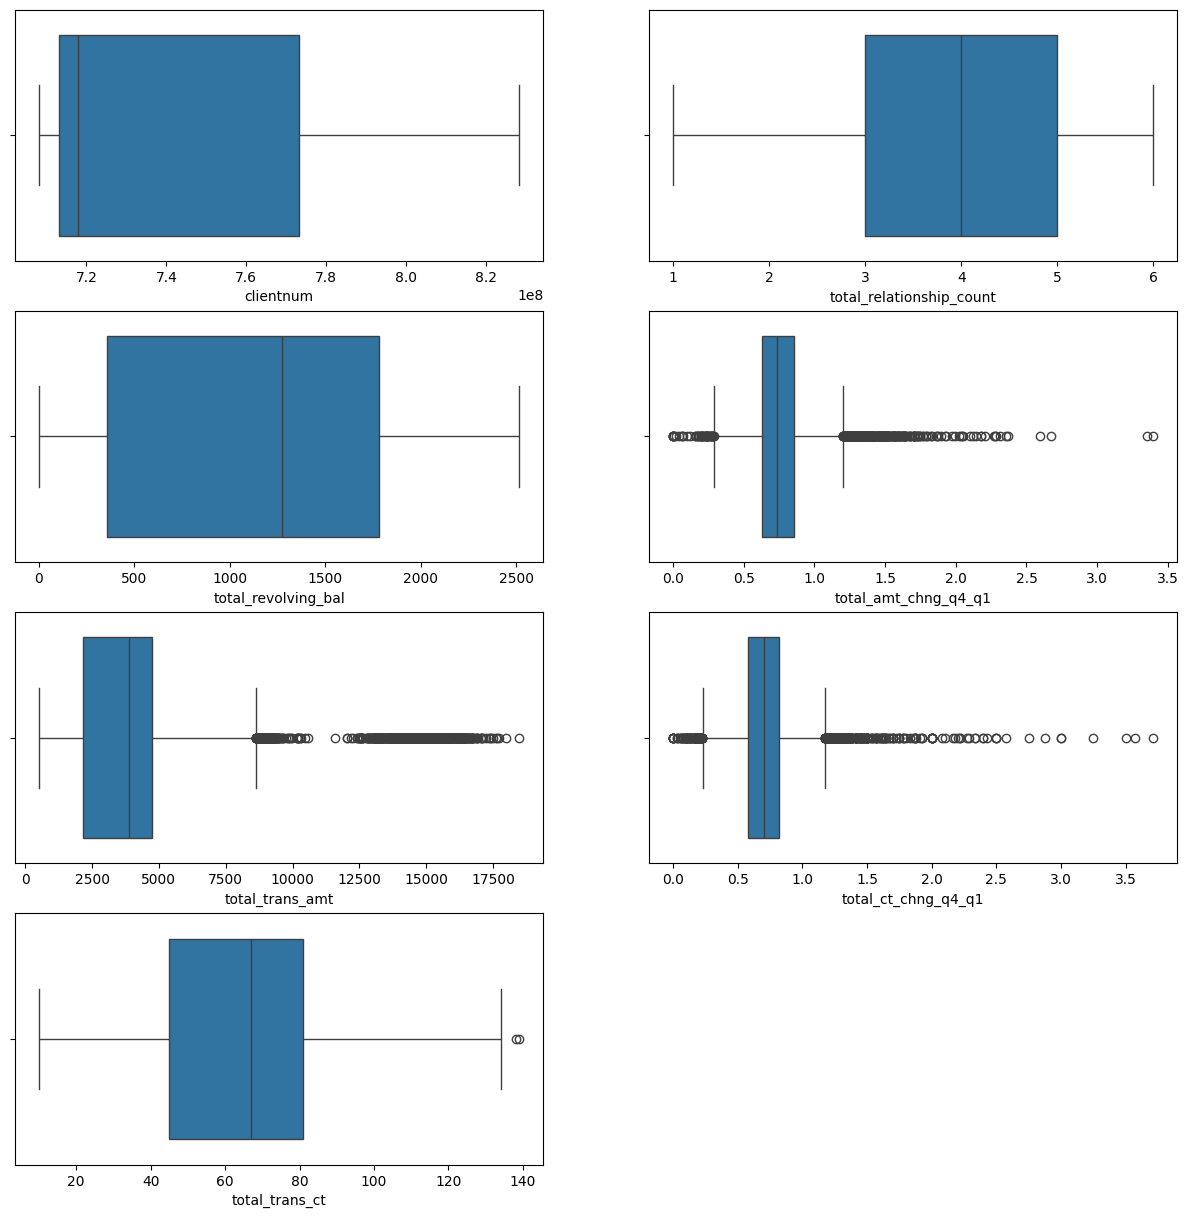





There are no outliers in the 'clientnum' column 


There are no outliers in the 'total_relationship_count' column 


There are no outliers in the 'total_revolving_bal' column 


The potential ouliers in the 'total_trans_ct' column are:
[138, 139] 
And the respective rows with the potential outlier are:
[1858, 10089]

 Detected too many potential outliers in the following columns: ['total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.


------------------------------end------------------------------


In [34]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in enriched_churn_df.columns:
    if enriched_churn_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=enriched_churn_df, ax=axs[i])

# Remove the subplot at index 7 from the axs array within the current figure
fig.delaxes(axs[7])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in enriched_churn_df.columns:
    if enriched_churn_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = enriched_churn_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

# Print custom border at the end
print("\n" + "-"*30 + "end" + "-"*30)

In [35]:
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


In [36]:
enriched_churn_df[enriched_churn_df.duplicated()].count()

clientnum                   0
total_relationship_count    0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_ct_chng_q4_q1         0
total_trans_ct              0
dtype: int64

In [37]:
variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(enriched_churn_df.columns):
    variables.loc[i] = [var, enriched_churn_df[var].nunique(), enriched_churn_df[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,clientnum,10127,"[828343083, 828298908, 828294933, 828291858, 8..."
1,total_relationship_count,6,"[3, 4, 6, 5, 1, 2]"
2,total_revolving_bal,1974,"[1793, 2035, 2437, 1821, 659, 765, 848, 1387, ..."
3,total_amt_chng_q4_q1,1158,"[0.803, 0.613, 0.765, 0.63, 0.938, 0.644, 0.76..."
4,total_trans_amt,5033,"[3646, 1770, 2519, 2381, 3756, 4053, 1408, 426..."
5,total_ct_chng_q4_q1,830,"[0.659, 0.741, 0.565, 0.481, 0.842, 0.692, 1.0..."
6,total_trans_ct,126,"[68, 47, 36, 40, 70, 66, 23, 92, 84, 33, 39, 4..."


Data Cleaning

In [38]:
df1 = bank_churners_df.copy()
df2 = basic_client_info_df.copy()
df3 = enriched_churn_df.copy()

# And then joining the resulting dataframes into one master dataset for easier access and manipulation
df = df1.merge(df2, on='clientnum').merge(df3, on='clientnum')

# Checking to make sure all 3 dataframes and their respective columns were joined correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  int64  
 8   avg_open_to_buy           10127 non-null  int64  
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_status            10127 non-null  object 
 14  income

Quality Issue to be Cleaned
Define
Change datatypes of clientnum variable in all 3 datasets from integer to string/object datatype



In [39]:
df = df.astype({'clientnum': 'object'})

In [40]:
df.clientnum.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: clientnum
Non-Null Count  Dtype 
--------------  ----- 
10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


Distribution Analysis for each of the columns in the dataset

/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/1442307539.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/1442307539.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/1442307539.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/1442307539.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/1442307539.py:34: UserWarning: FixedFormatter s

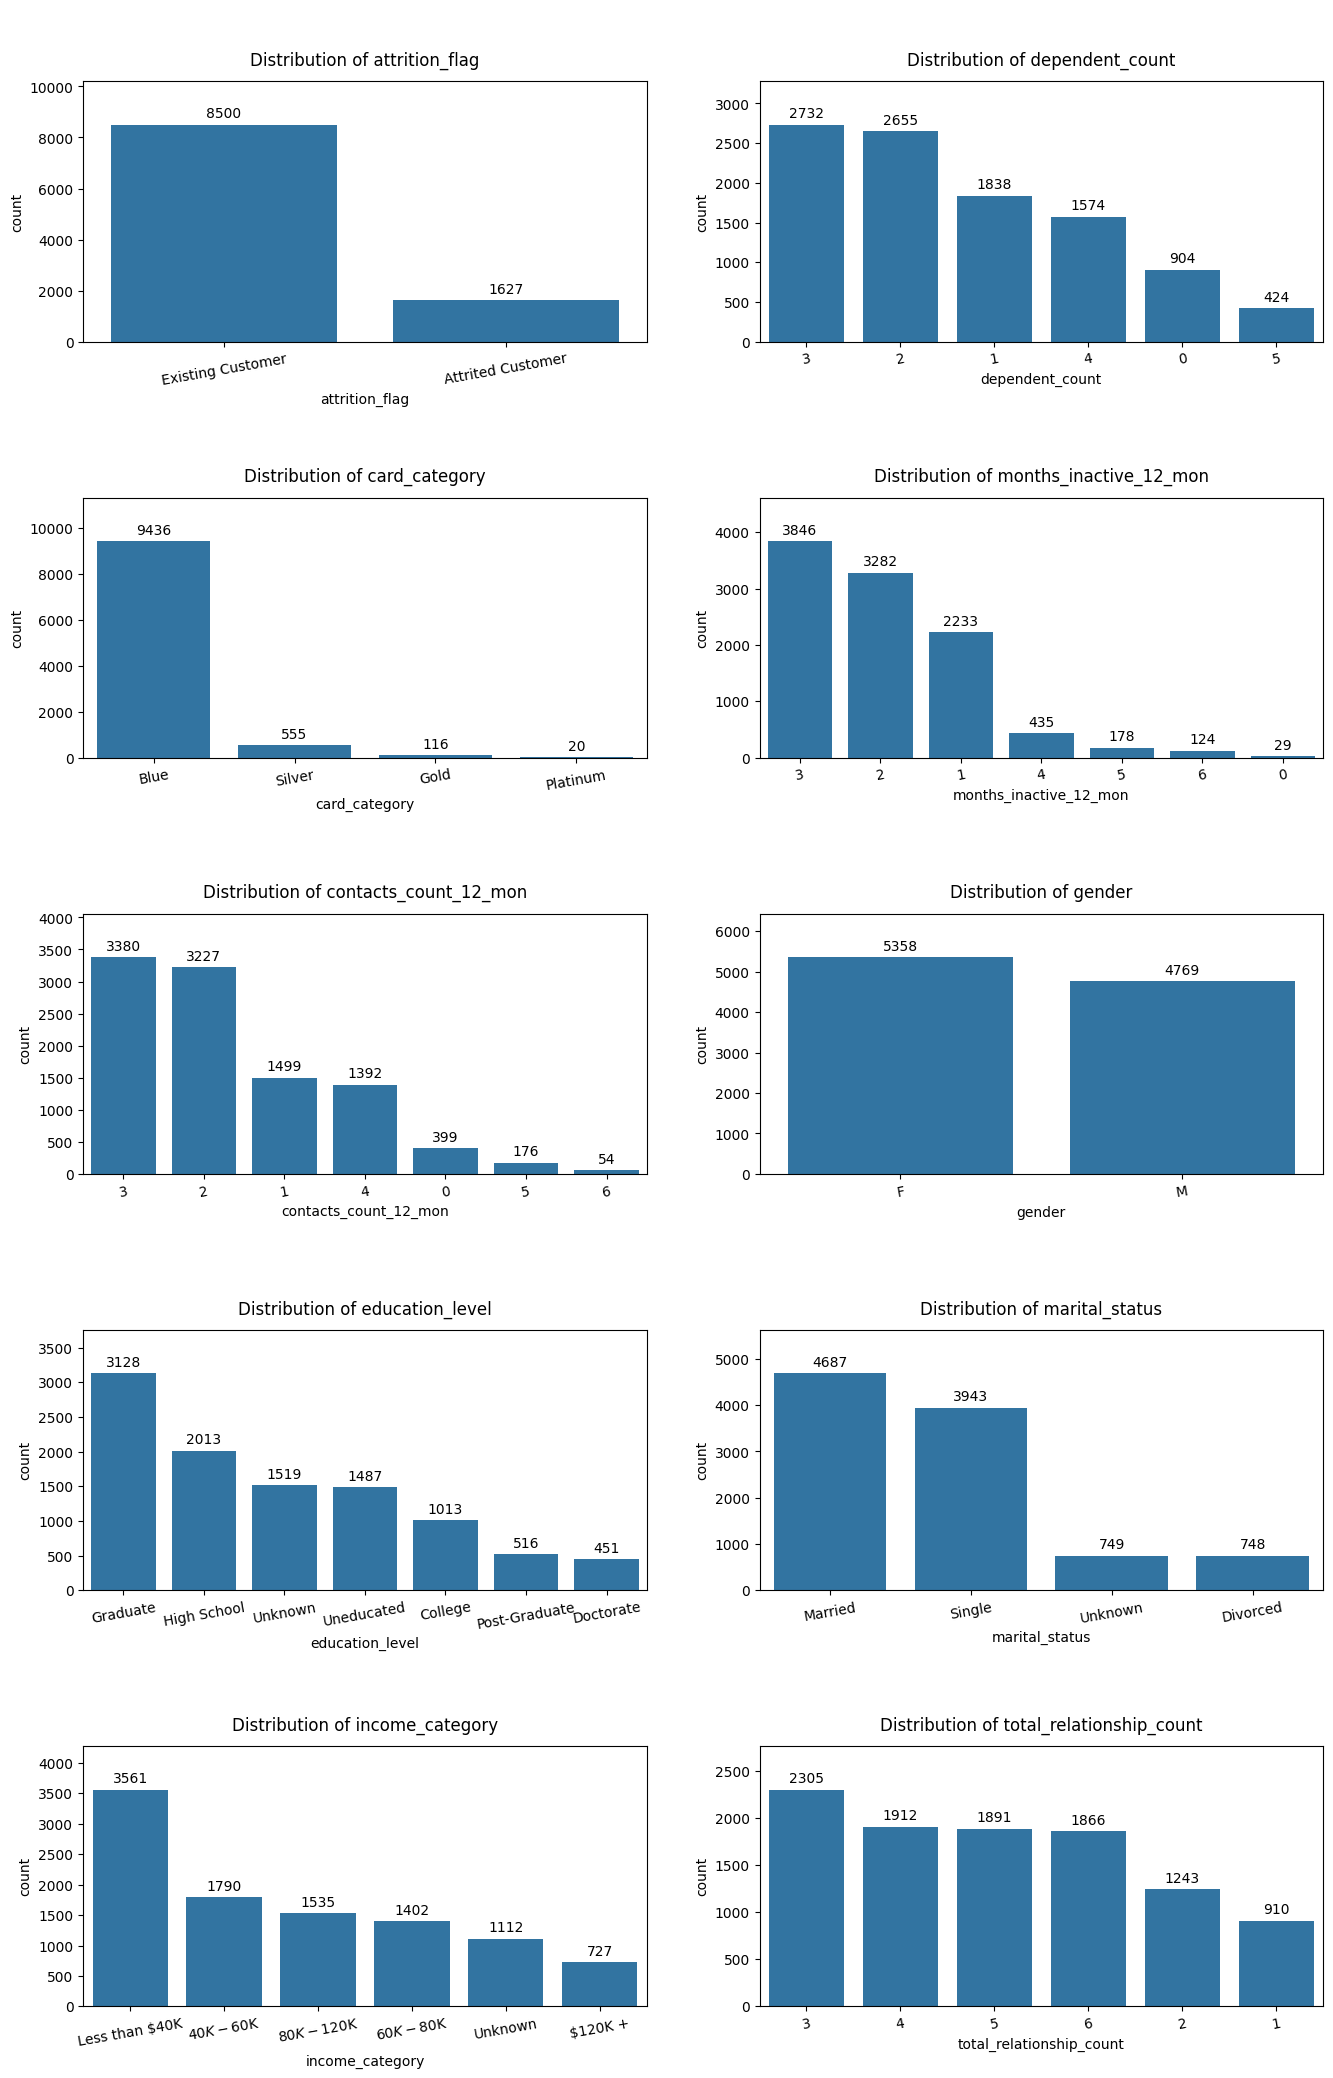

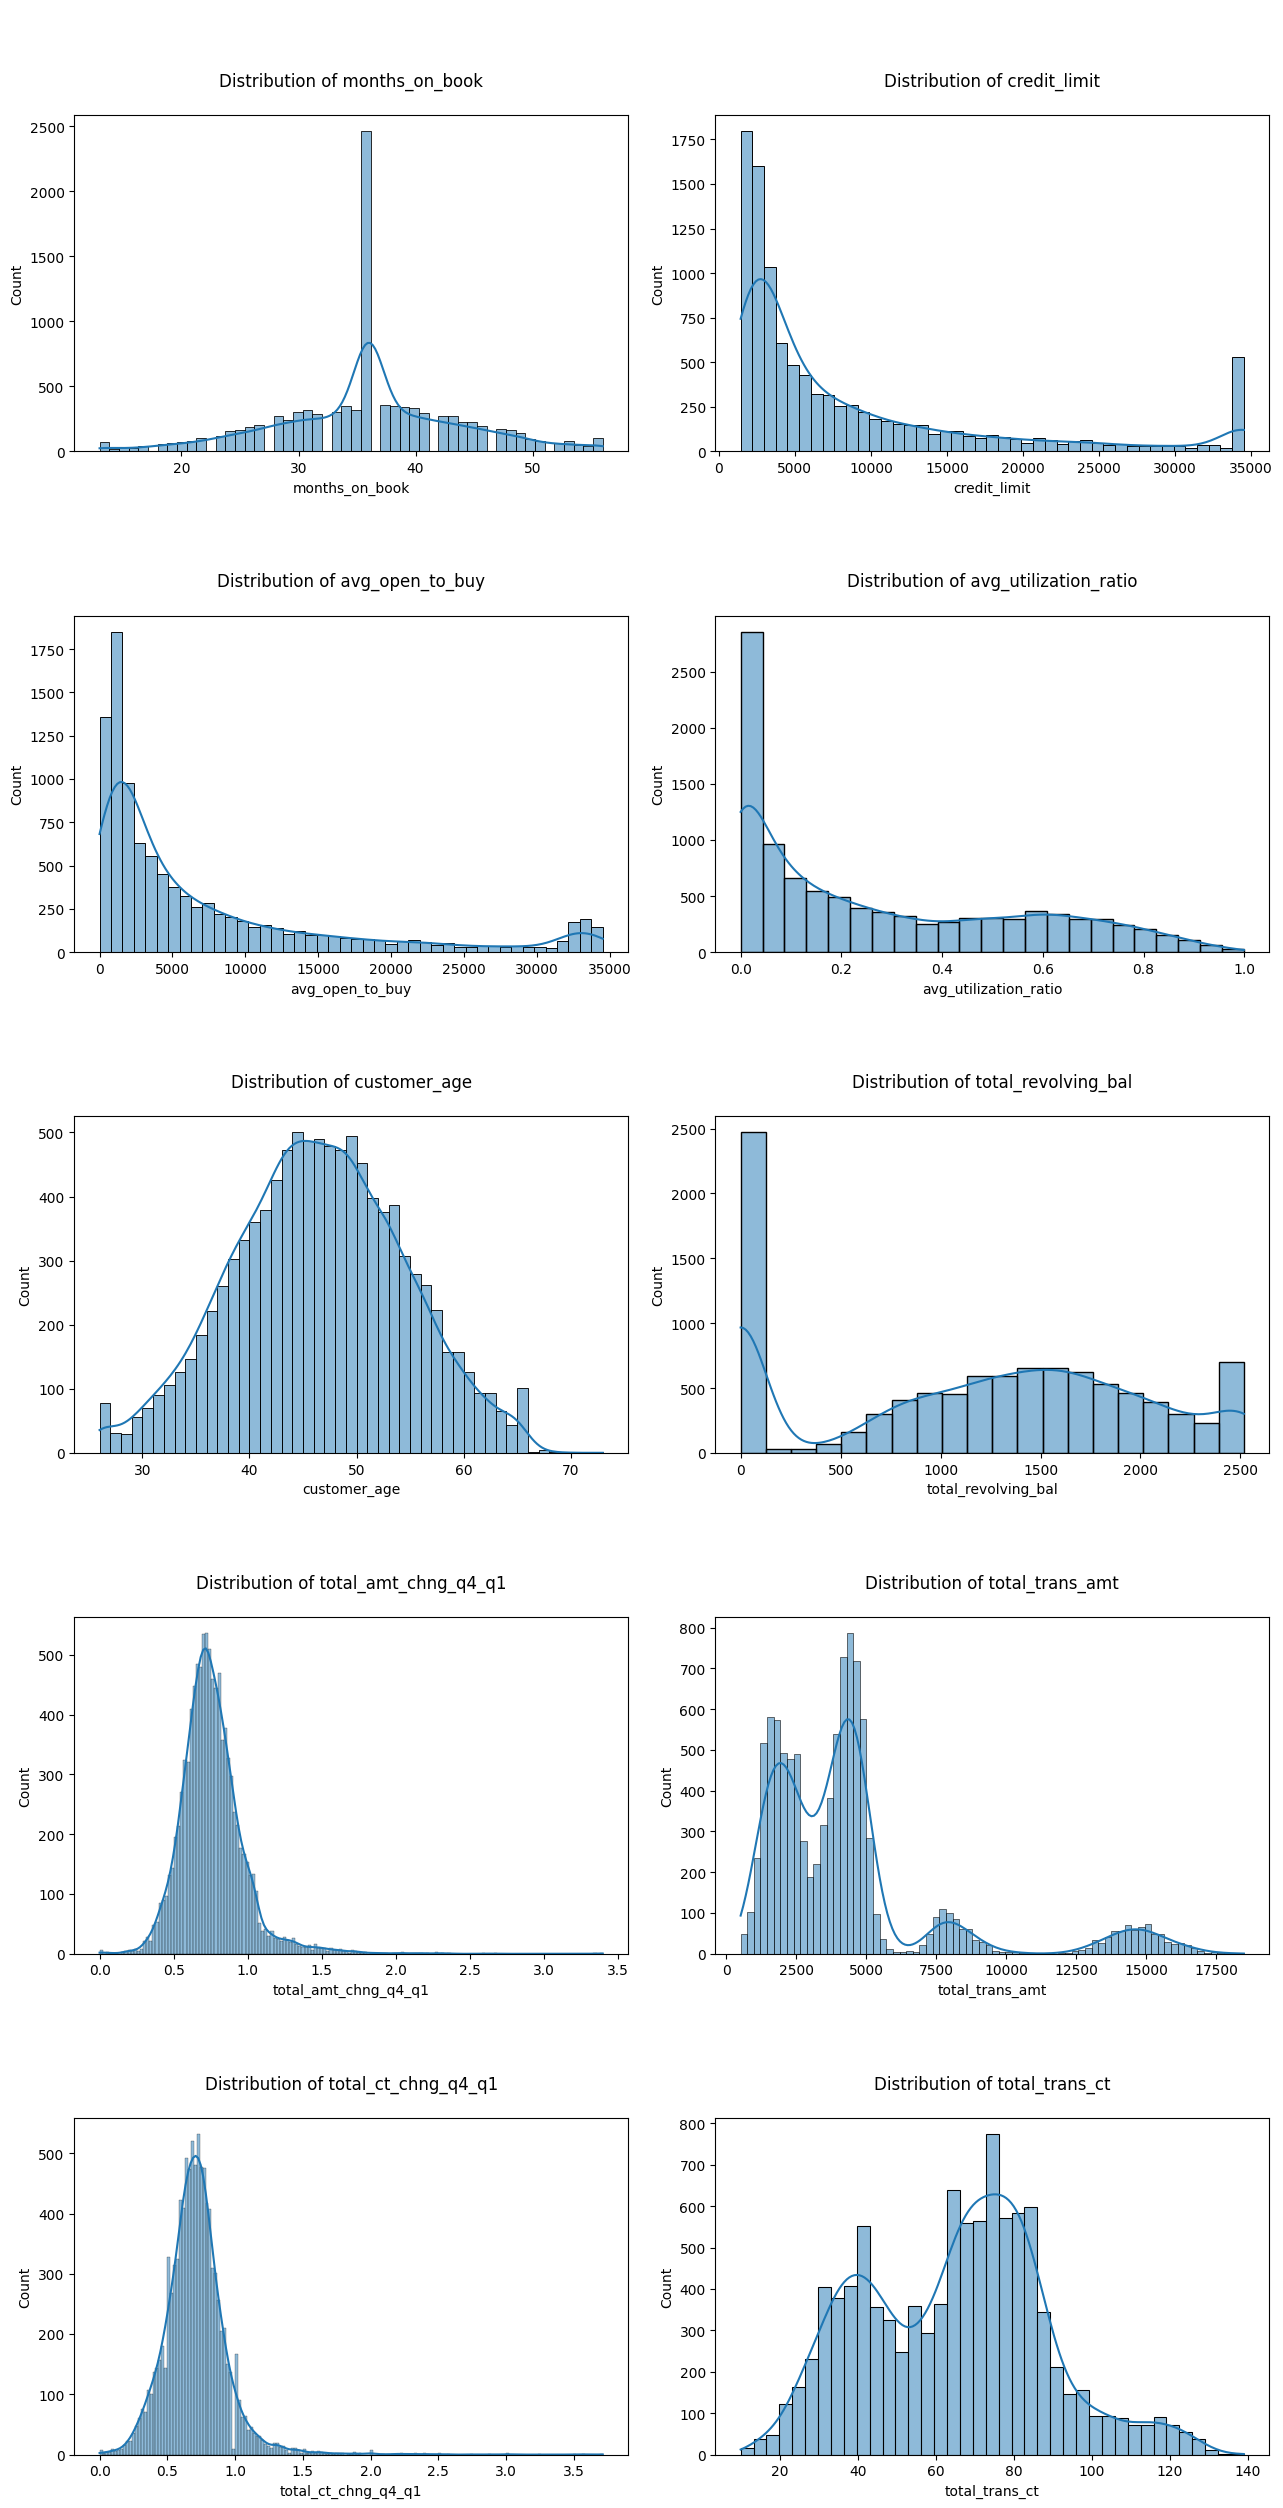

,months_on_book,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,35.928409,8631.938679,7469.124617,0.274894,46.325960,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,7.986416,9088.788539,9090.695763,0.275691,8.016814,814.987335,0.219207,3397.129254,0.238086,23.472570
min,13.000000,1438.000000,3.000000,0.000000,26.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,31.000000,2555.000000,1324.500000,0.023000,41.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,36.000000,4549.000000,3474.000000,0.176000,46.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,40.000000,11067.500000,9859.000000,0.503000,52.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,56.000000,34516.000000,34516.000000,0.999000,73.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [41]:
column_list = []

# Create two empty lists, one to store names of variables with unique vals < 10, and the other for variables with non-unique vals
unique_val_vars = []
non_unique_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in df.columns:
    unique_vals = df[column_name].value_counts().sort_values(ascending=False).index
    unique_count = len(unique_vals)
    
    if unique_count < 10:        
        unique_val_vars.append(column_name)
    else:
        non_unique_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 25))

# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()

# Set the color of the bars to default blue color
plot_color = sns.color_palette()[0]

# Iterate through the list of variables with unique vals < 10 and count plots of data in each variable
for i, var in enumerate(unique_val_vars):
    # Sort the bars in the count plot in descending order using the sorted unique values in the variable
    sorted_order = df[var].value_counts().sort_values(ascending=False).index
    # Create the plot using seaborn's countplot and pass the sorted values in the order parameter,use preset color palette
    plot = sns.countplot(x=var, data=df, ax=axs[i], order=sorted_order, color=plot_color)    
    # Rotate the x-axis tick labels to make then readable
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
    # Set the plot title
    axs[i].set_title(f"\n\nDistribution of {var}\n", y=0.95)
    
    # Add bar labels containing the count
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
        
    # Set the top margin to  to 110% of the highest bar's count (i.e 1.1 times the maximum count)
    axs[i].set_ylim(0, max(df[var].value_counts()) * 1.2)
    

# Adjust the figure's subplot positions and margins, and then display the figure
plt.subplots_adjust(hspace=0.6)
plt.tight_layout
plt.show();


num_rows = (len(non_unique_vars) - 1) // 2 + 1
num_cols = 2

# Set the figure size
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(13, 5 * num_rows))

# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()

# Filter out the 'clientnum' variable from the non_unique_vars list
filtered_non_unique_vars = [var for var in non_unique_vars if var != 'clientnum']

# New loop for filtered_non_unique_vars
for i, var in enumerate(filtered_non_unique_vars):
    # add to list that would be explained also using descriptive stats
    column_list.append(var)
    
    # Plot the distribution histograms using the corresponding axes
    sns.histplot(x=var, data=df, color=plot_color, kde=True, ax=axs[i])
    # Set the plot title
    axs[i].set_title(f'\n\n \nDistribution of {var}\n')
    
    
# Adjust the figure's subplot positions and margins, delete empty plots in the figure, and then display the figure
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
fig.delaxes(axs[10])
fig.delaxes(axs[11])
plt.show();

print("\n")

df[column_list].describe()

Observation



/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/2810922371.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/2810922371.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/2810922371.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/2810922371.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
/var/folders/5g/qwgtmhgj1_7bjbkjb244jb880000gn/T/ipykernel_94822/2810922371.py:22: UserWarning: FixedFormatter s

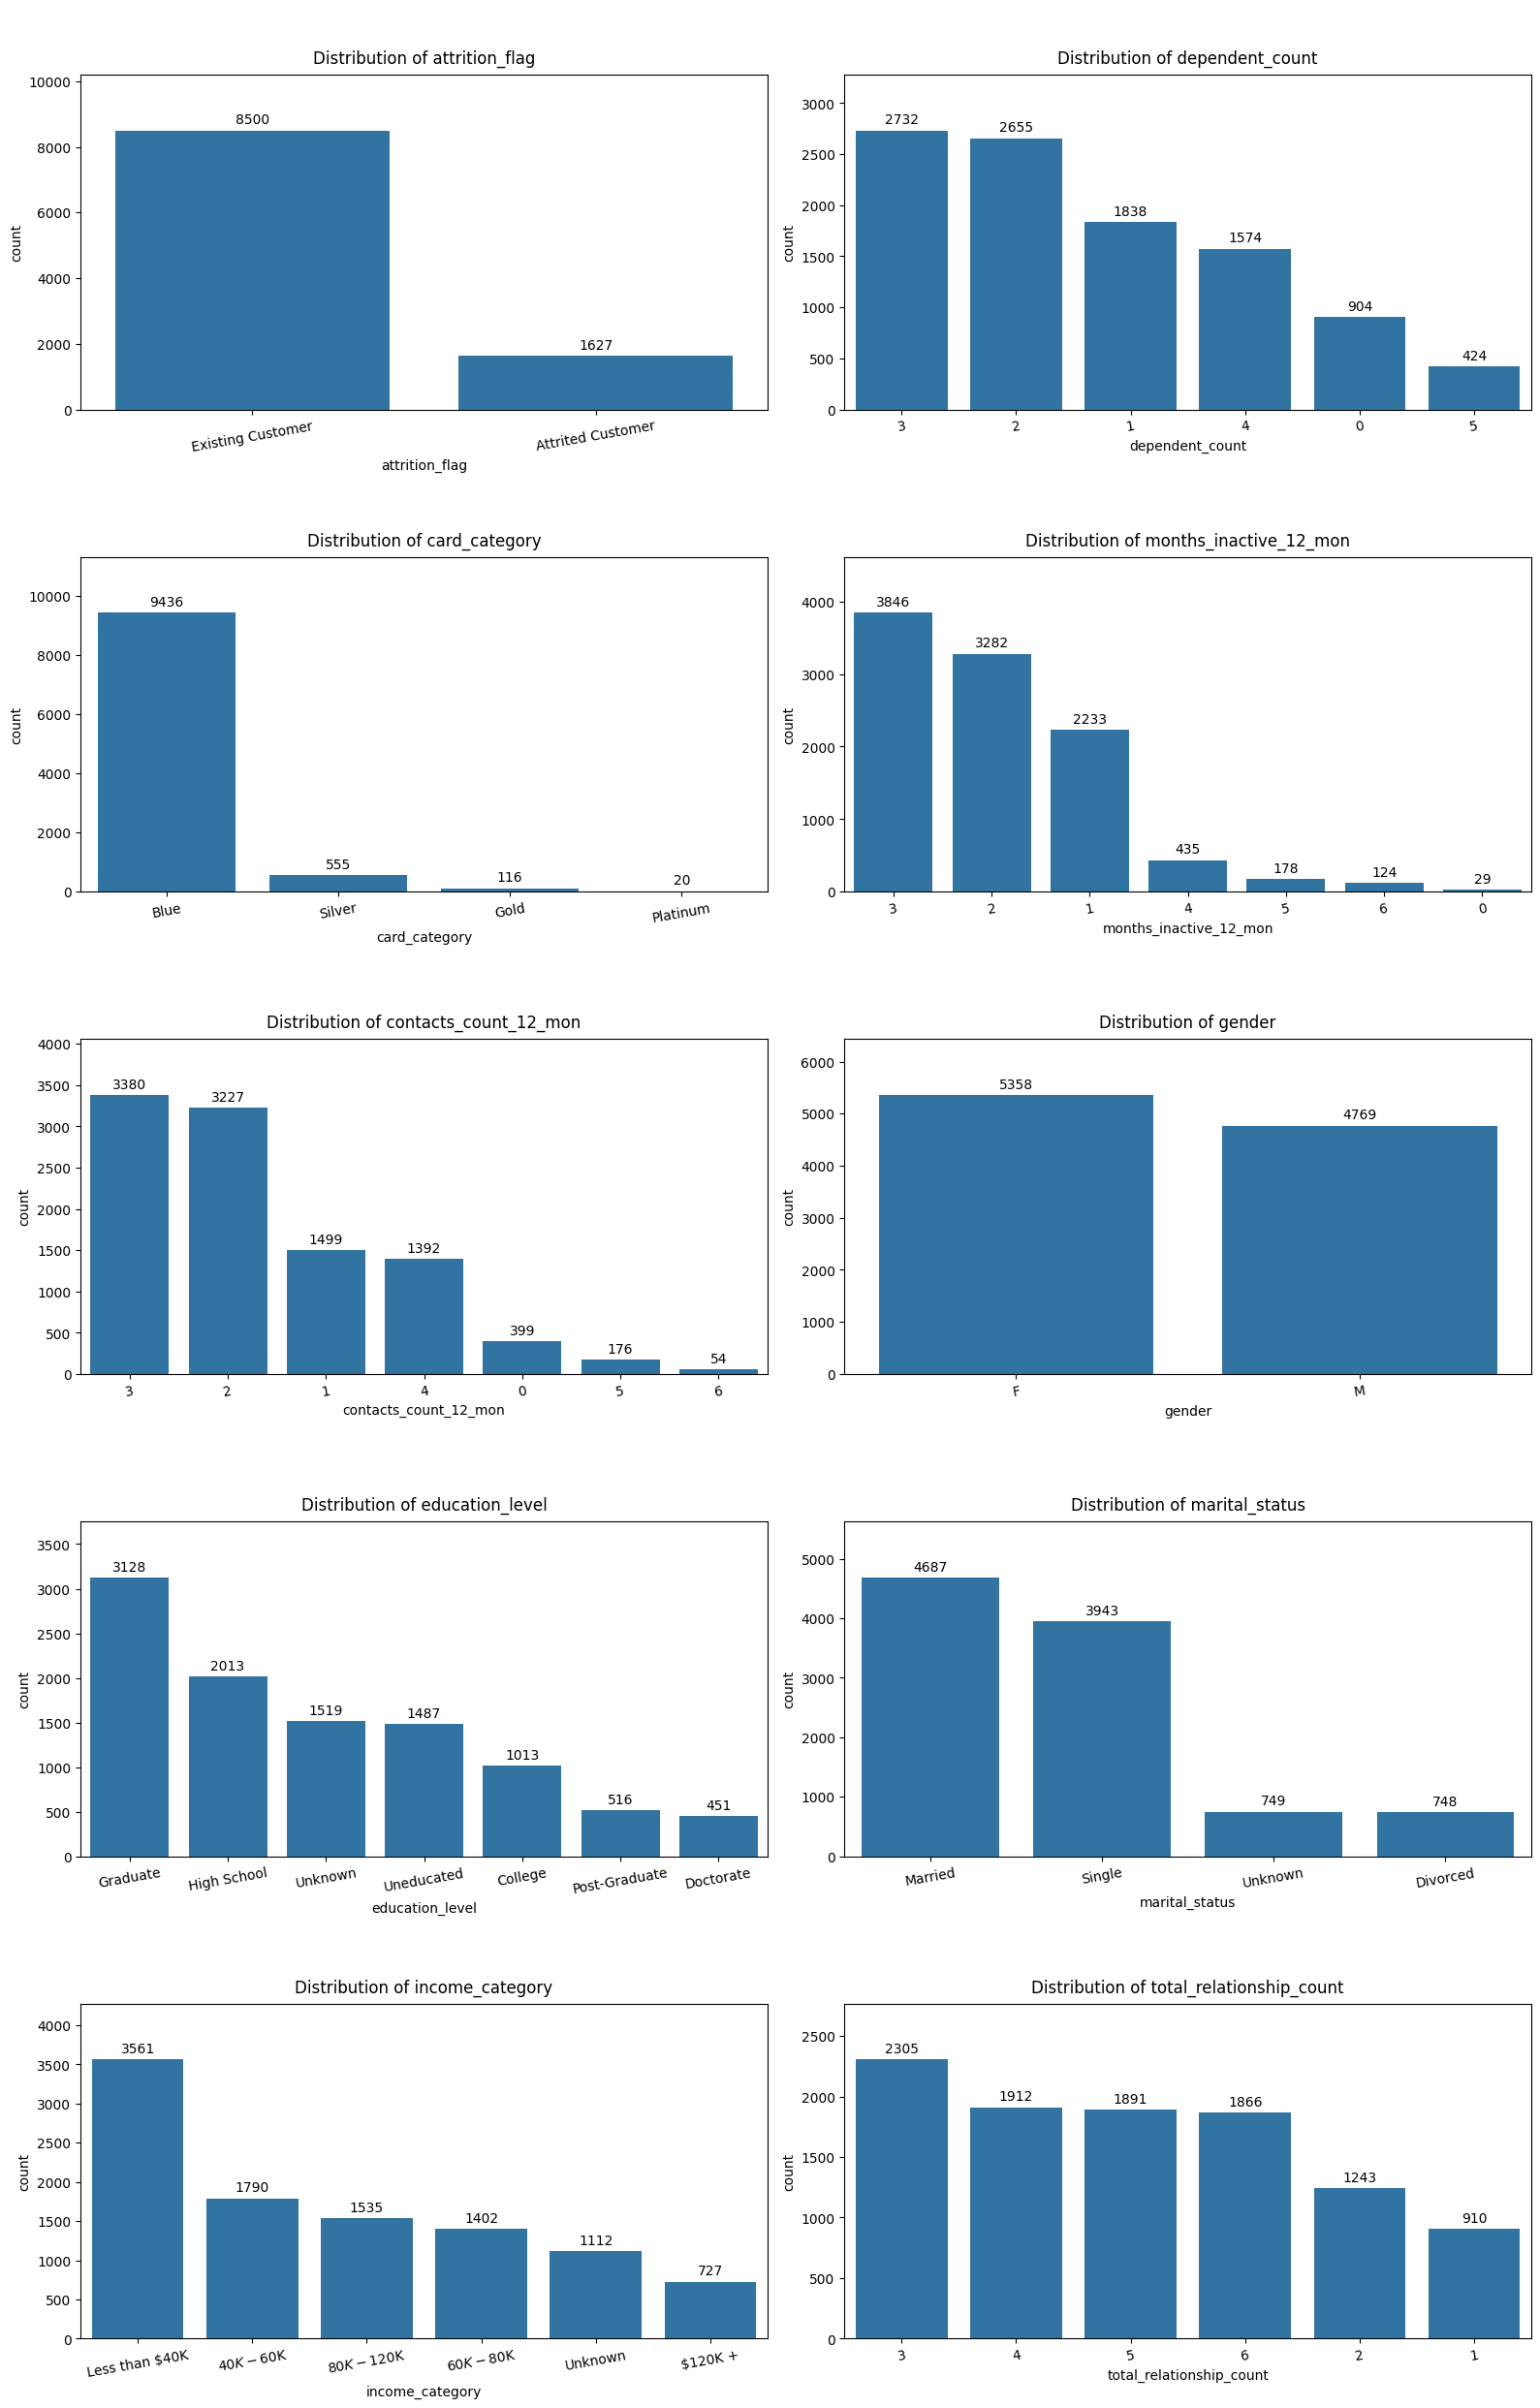

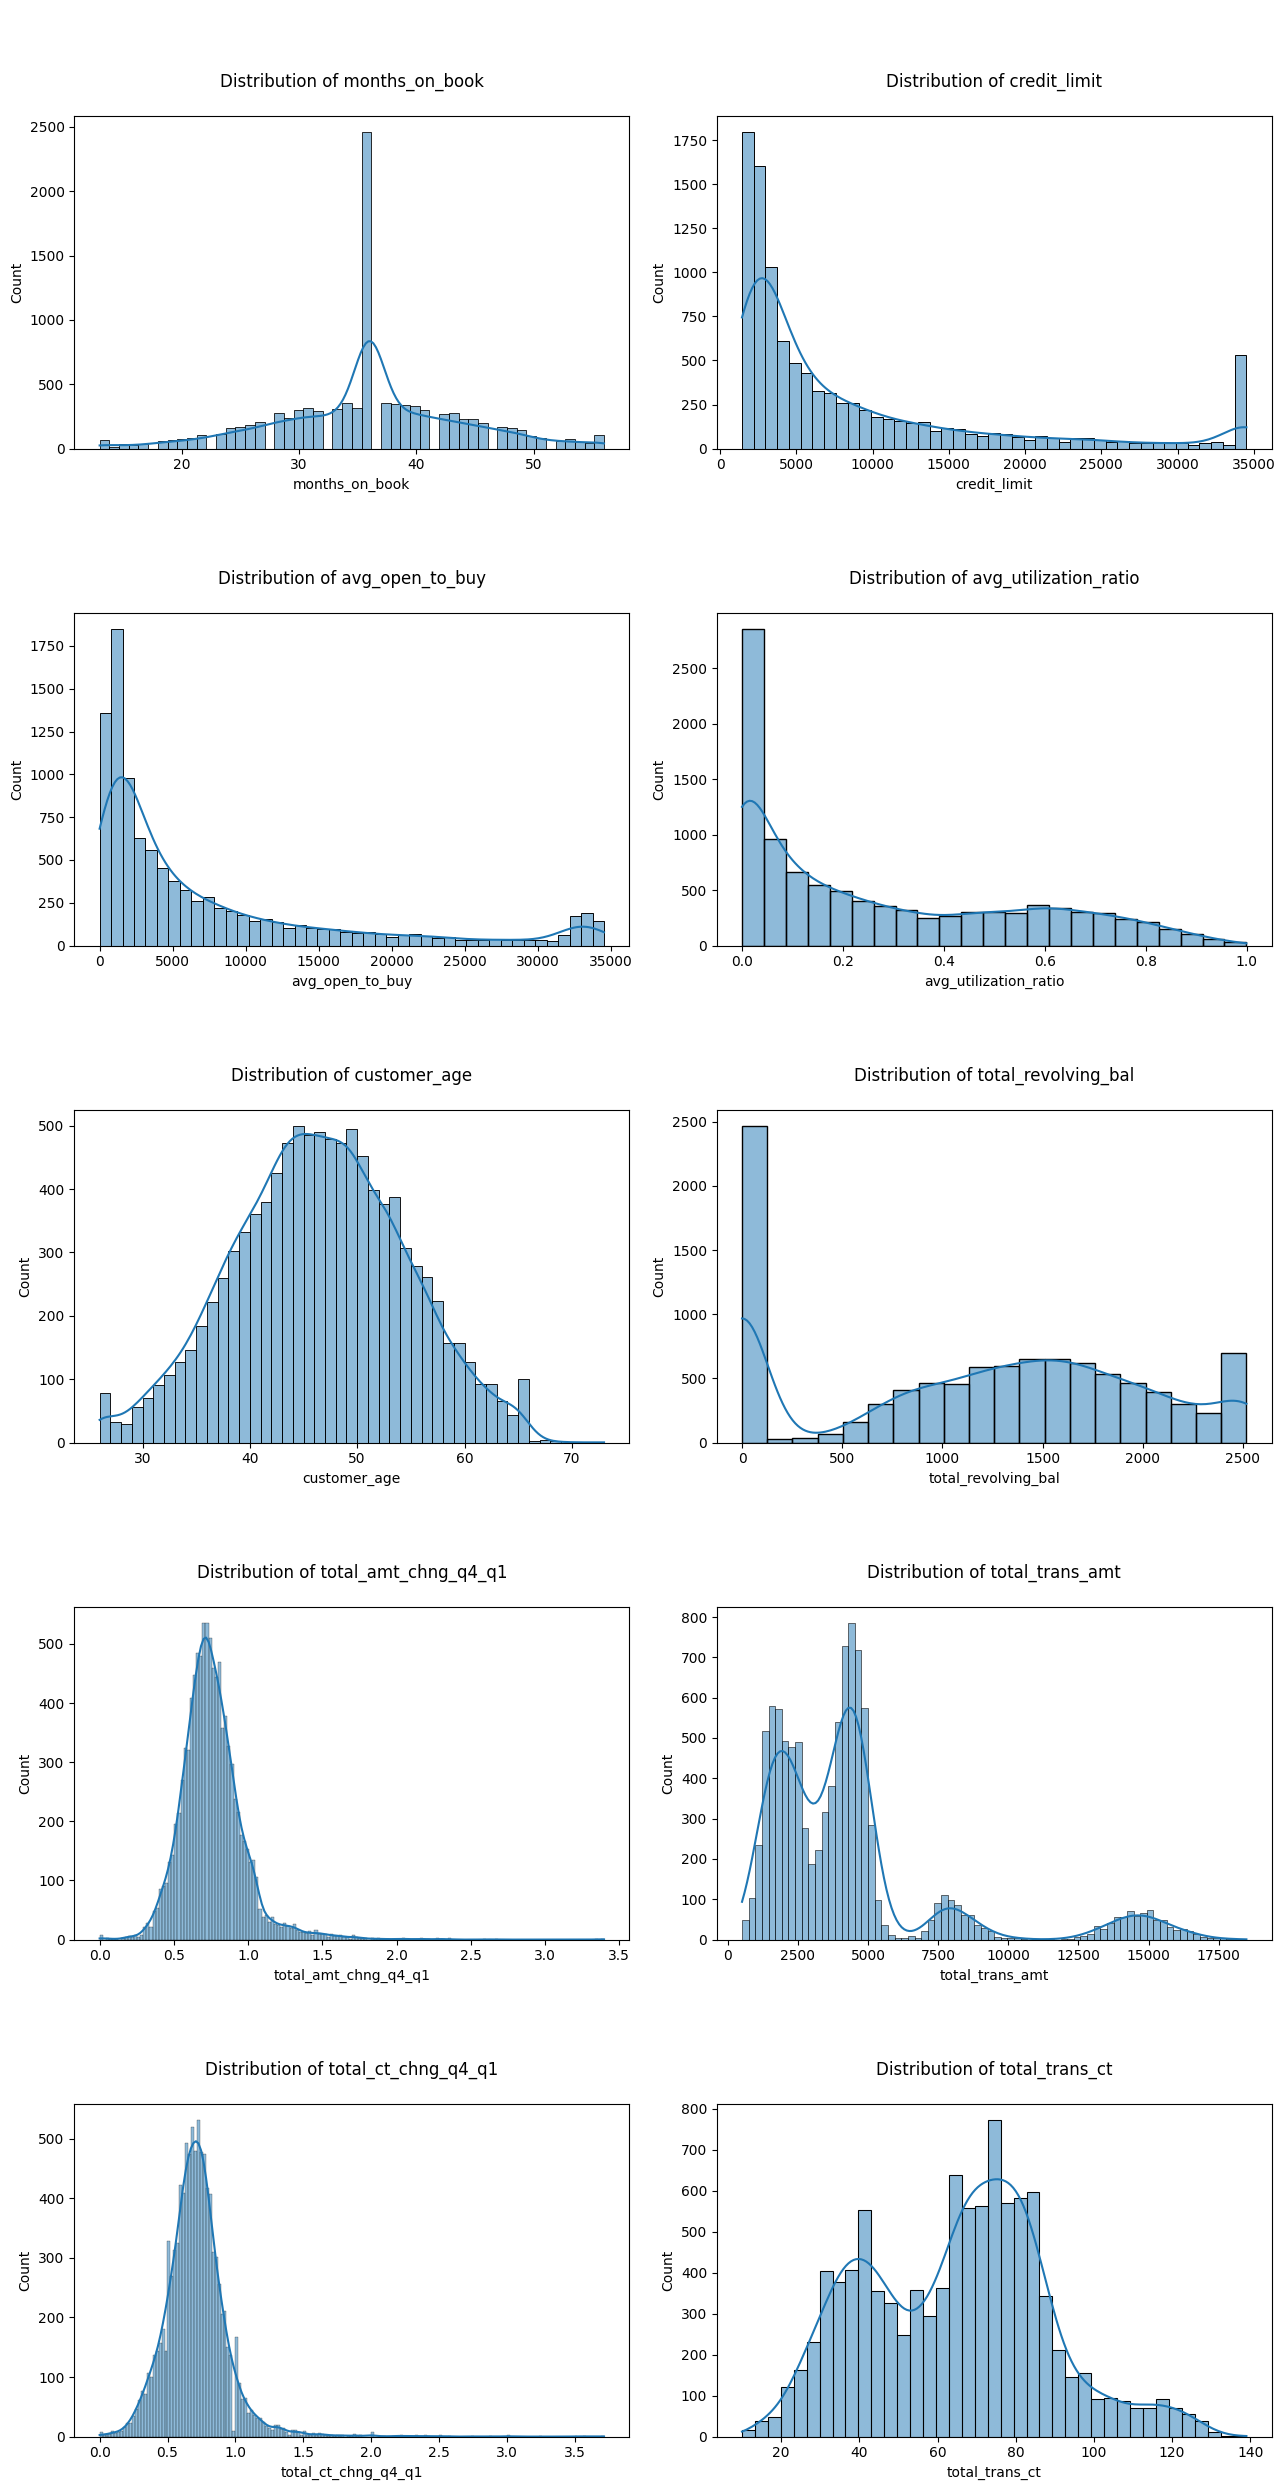

,months_on_book,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,35.928409,8631.938679,7469.124617,0.274894,46.325960,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,7.986416,9088.788539,9090.695763,0.275691,8.016814,814.987335,0.219207,3397.129254,0.238086,23.472570
min,13.000000,1438.000000,3.000000,0.000000,26.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,31.000000,2555.000000,1324.500000,0.023000,41.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,36.000000,4549.000000,3474.000000,0.176000,46.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,40.000000,11067.500000,9859.000000,0.503000,52.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,56.000000,34516.000000,34516.000000,0.999000,73.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

column_list = []
unique_val_vars = []
non_unique_vars = []

for column_name in df.columns:
    unique_count = df[column_name].nunique()
    if unique_count < 10:
        unique_val_vars.append(column_name)
    else:
        non_unique_vars.append(column_name)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 25))
axs = axs.flatten()
plot_color = sns.color_palette()[0]

for i, var in enumerate(unique_val_vars):
    sorted_order = df[var].value_counts().sort_values(ascending=False).index
    plot = sns.countplot(x=var, data=df, ax=axs[i], order=sorted_order, color=plot_color)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
    axs[i].set_title(f"\n\nDistribution of {var}\n", y=0.95)
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=10, 
                      color='black', xytext=(0, 5), textcoords='offset points')
    axs[i].set_ylim(0, df[var].value_counts().max() * 1.2)

plt.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.show()

filtered_non_unique_vars = [var for var in non_unique_vars if var != 'clientnum']
num_rows = (len(filtered_non_unique_vars) - 1) // 2 + 1
num_cols = 2

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(13, 5 * num_rows))
axs = axs.flatten()

for i, var in enumerate(filtered_non_unique_vars):
    column_list.append(var)
    sns.histplot(x=var, data=df, color=plot_color, kde=True, ax=axs[i])
    axs[i].set_title(f'\n\n \nDistribution of {var}\n')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()

# Clean-up unused axes (only if extra axes exist)
for j in range(len(filtered_non_unique_vars), len(axs)):
    fig.delaxes(axs[j])

plt.show()

print("\n")
df[column_list].describe()


list the findings